# Introduction to Statistics

author: Maya Fishbach, with some material borrowed from the [Starfish school](https://starfishschool.github.io/#resources) and Carl Haster

![title](https://imgs.xkcd.com/comics/correlation.png)


## Types of Data
* quantitative
    * continuous (e.g. real numbers)
    * discrete (e.g. integers)
* categorical
    * nominal (e.g. categories A, B, C)
    * ordinal (e.g. a Likert Scale used in a survey)

### Can you think of examples from physics or astronomy of each type of data?

## Probability Distributions

* Probability density function (for continuous quantities)
  * Analytic examples include Gaussian (aka Normal), power law (aka Pareto), etc.
* Probability mass function (for discrete quantities)
  * Analytic examples include Binomial distribution, Poisson distribution, etc.

In [1]:
import numpy as np

import matplotlib 
%matplotlib inline
%config InlineBackend.figure_format='retina'
matplotlib.rcParams['figure.figsize'] = (5, 3)
import matplotlib.pyplot as plt


import scipy.stats as ss

### Gaussian (aka Normal) Distribution 
probability density function 
$$p(x | \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$

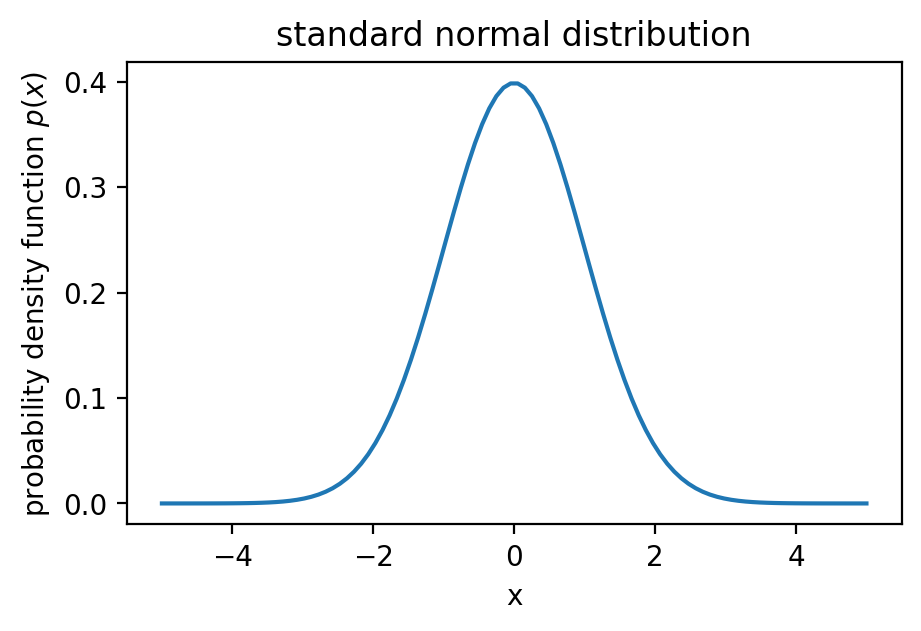

In [2]:
x = np.linspace(-5,5,100)
pdf = ss.norm.pdf(x) #default is mean mu = 0, standard deviation sigma = 1

plt.plot(x, pdf)

plt.xlabel('x')
plt.ylabel(r'probability density function $p(x)$')
plt.title('standard normal distribution') #"standard" refers to mu = 0, sigma = 1
plt.show()

Probability densities are only proper probabilities (a value between 0 and 1) when integrated over some region.
Integrating over all possible values, a probability density function integrates to 1.
The cumulative distribution function (CDF) is the probability P(X < x), or the cumulative integral of the probability density function 


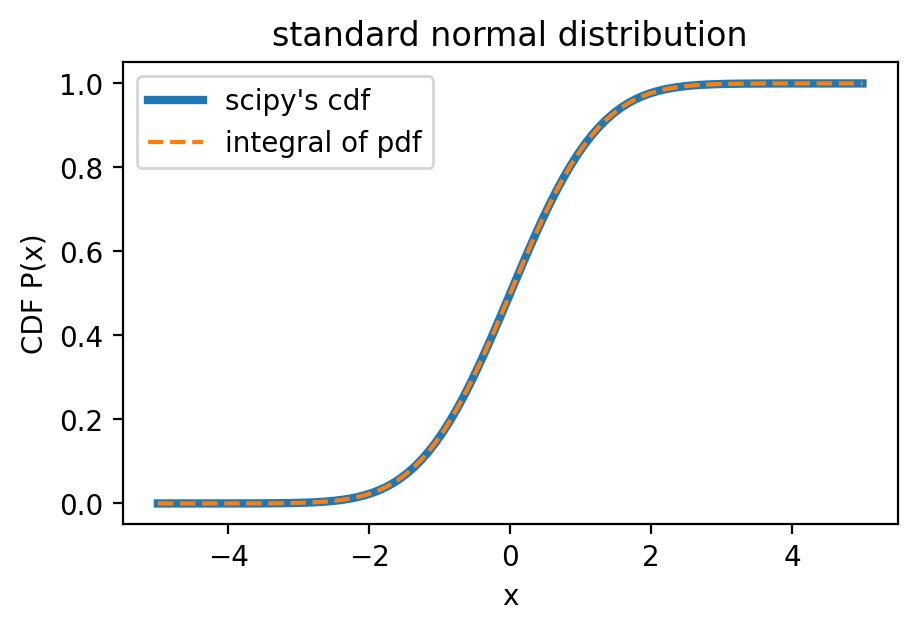

In [3]:
cdf = ss.norm.cdf(x)

plt.plot(x, cdf,lw = 3, label = "scipy's cdf")

#check that cumulative integral gives the same thing

from scipy.integrate import cumulative_trapezoid as cumtrapz

cdf2 = cumtrapz(pdf, x, initial = 0)

plt.plot(x, cdf2, ls = '--', label = "integral of pdf")

plt.xlabel('x')
plt.ylabel(r'CDF P(x)')
plt.title("standard normal distribution")
plt.legend(loc = 'best')
plt.show()

### Poisson Distribution

Probability mass function

$$f(k | \mu) = \exp(-\mu)\frac{\mu^k}{k!} $$ 
for $k \geq 0$

Text(0.5, 1.0, 'Poisson distribution')

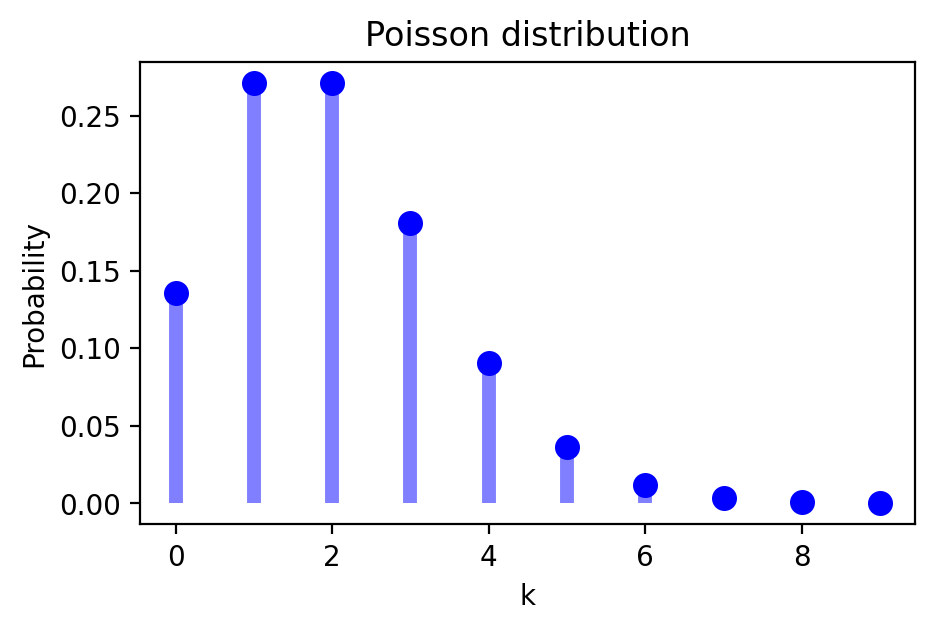

In [4]:
k = np.arange(10)

mu = 2 #expectation value

pmf = ss.poisson.pmf(k, mu)

plt.plot(k, pmf, 'bo', ms=8)
plt.vlines(k, 0, pmf, colors='b', lw=5, alpha=0.5)

plt.xlabel('k')
plt.ylabel('Probability')
plt.title('Poisson distribution')

## Random variables

Data are realizations of a random variable. A random variable follows a distribution.

For example, if I flip a fair coin 10 times, the number of tails I get is drawn from a binomial distribution with parameters $n = 10$, $p = 0.5$.

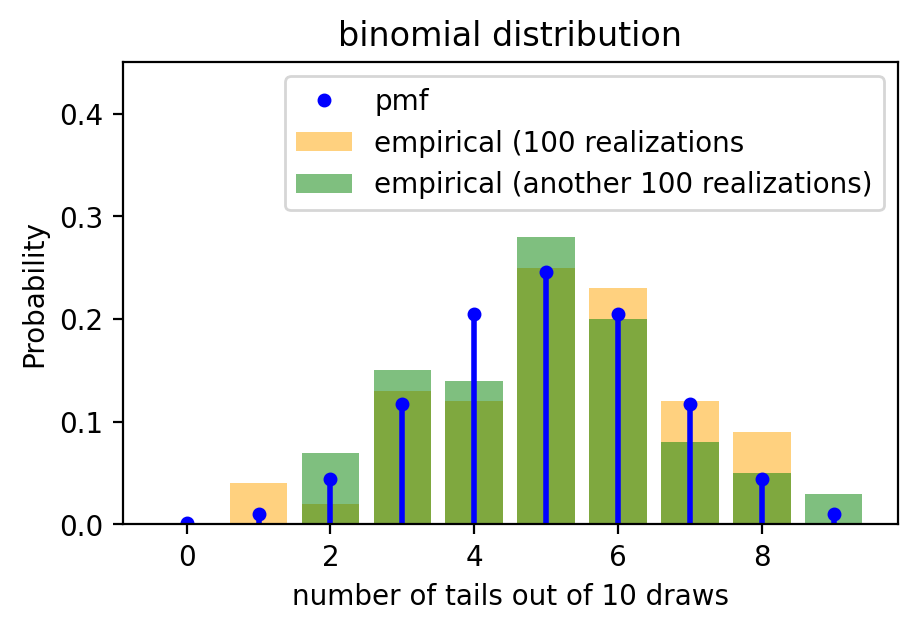

In [5]:
n_trials = 10
coin_dist = ss.binom(n = n_trials, p = 0.5) 

#as before, I can plot the pmf of the distribution

k = np.arange(n_trials)
plt.plot(k, coin_dist.pmf(k), 'bo', ms = 4, label = 'pmf')
plt.vlines(k, 0, coin_dist.pmf(k), colors='b', lw=2)


#I can also draw random variables from the distribution
#Let's say I repeat my coin toss experiment 100 times
n_exp = 100
n_tails = coin_dist.rvs(n_exp) 

plt.hist(n_tails, bins = np.arange(n_trials+1)-0.5, histtype = 'bar', color = 'orange', alpha = 0.5, rwidth=0.8, density = True, label = 'empirical (100 realizations')

#what if I repeat it another 100 times?
n_tails_2 = coin_dist.rvs(n_exp) 
plt.hist(n_tails_2, bins = np.arange(n_trials+1)-0.5, histtype = 'bar', color = 'green', alpha = 0.5, rwidth=0.8, density = True, label = 'empirical (another 100 realizations)')


plt.legend(loc = 'best')

plt.xlabel('number of tails out of 10 draws')
plt.ylabel('Probability')
plt.title('binomial distribution')

plt.ylim(0,0.45)

plt.show()

## Summary statistics

Given a dataset, we often want to describe it with some summary statistics:
* "Average"
  * Mean
  * Median
  * Mode
* "Width"
  * Standard deviation/ variance
  * Quantiles
  * Minimum, maximum
* higher moments
  * skewness
  * kurtosis

For higher dimensional data, we also describe the correlation between different dimensions, etc. 

Let's look at some data (from Carl Haster).
We have three datasets, and each is bivariate (each datapoint consists of an 'x' and 'y' value, unlike the univariate examples above).
Can you think of any examples of bivariate data (from astronomy or otherwise?)

In [6]:
import pandas as pd

In [7]:
df0 = pd.read_csv("dataset_0.csv")
df1 = pd.read_csv("dataset_1.csv")
df2 = pd.read_csv("dataset_2.csv")

In [8]:
#each pandas dataframe looks like this:
df0

,x_values,y_values
0,32.331110,61.411101
1,53.421463,26.186880
2,63.920202,30.832194
3,70.289506,82.533649
4,34.118830,45.734551
...,...,...
137,59.851838,72.958391
138,48.960460,72.629526
139,46.844855,36.791714
140,39.963022,42.944915


In [9]:
#pandas can easily calculate summary statistics for dataframes, for example:
df0.describe()

,x_values,y_values
count,142.000000,142.000000
mean,54.266100,47.834721
std,16.769825,26.939743
min,15.560750,0.015119
25%,39.724115,24.625892
50%,53.340296,47.535269
75%,69.146597,71.803148
max,91.639961,97.475771


In [10]:
#you can also choose your own summary statistics to display, e.g.

for i, df in enumerate([df0,df1,df2]):
    print(f"dataset {i} summary statistics:")
    print(df.agg(
        {
        "x_values": ["mean", "std"],
        "y_values": ["mean", "std"],
        }))

dataset 0 summary statistics:
       x_values   y_values
mean  54.266100  47.834721
std   16.769825  26.939743
dataset 1 summary statistics:
       x_values   y_values
mean  54.260303  47.839829
std   16.767735  26.930192
dataset 2 summary statistics:
       x_values   y_values
mean  54.263273  47.832253
std   16.765142  26.935403


In [11]:
#we can also look at the correlation between x- and y-values in each dataset

df0.corr()

,x_values,y_values
x_values,1.000000,-0.064128
y_values,-0.064128,1.000000


In [12]:
for i, df in enumerate([df0,df1,df2]):
    print(f"dataset {i} correlation coefficient between x and y:")
    print(df['x_values'].corr(df['y_values']))

dataset 0 correlation coefficient between x and y:
-0.06412835215474484
dataset 1 correlation coefficient between x and y:
-0.06034144199353862
dataset 2 correlation coefficient between x and y:
-0.06447185270095163


Based on the summary statistics, the datasets look very similar! Let's plot them.

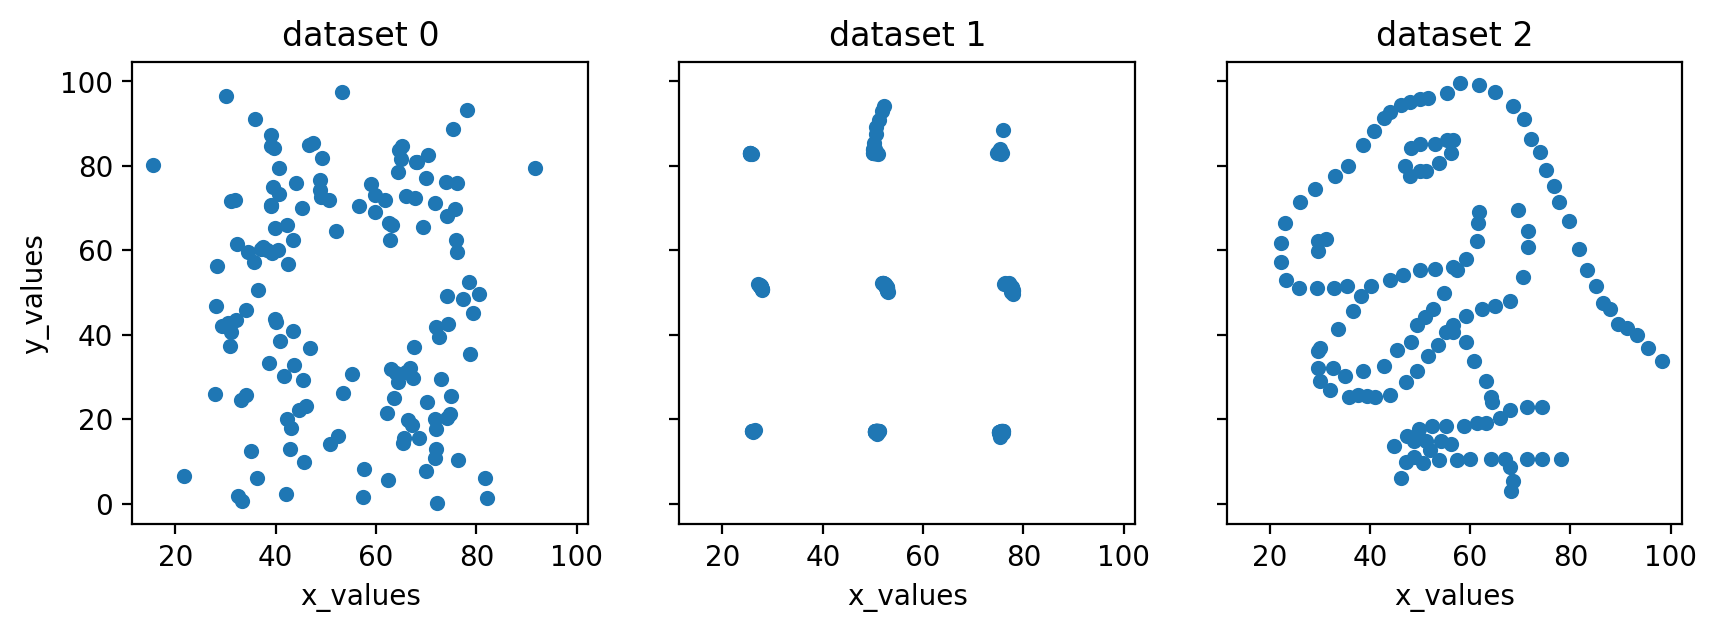

In [13]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize = (10,3))

for i, df in enumerate([df0,df1,df2]):
    df.plot.scatter(x = "x_values", y = "y_values", ax = ax[i])
    ax[i].set_title(f"dataset {i}")

Lesson: always plot your data! Summary statistics are convenient, but don't tell the whole story.

Other plots that are often useful for multidimensional data are corner plots (see, e.g. [corner.py](https://corner.readthedocs.io/en/latest/)) or panda's scatter matrix.

For example,

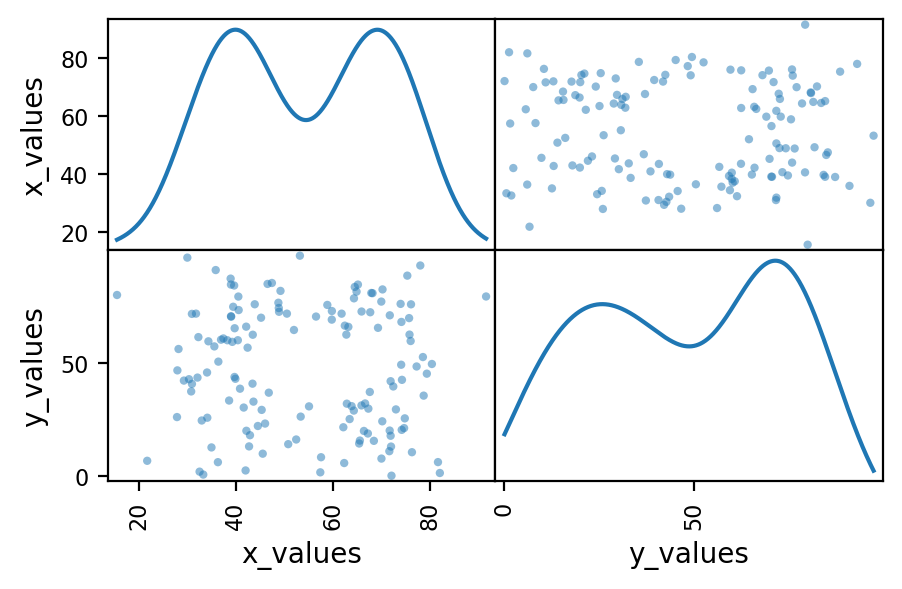

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(df0, diagonal="kde");

Some additional tools for data visualization are:
* https://www.data-to-viz.com/
* Python packages (in addition to matplotlib):
  * [arviz](https://www.arviz.org/en/latest/)
  * [seaborn](https://seaborn.pydata.org/) 